<a href="https://colab.research.google.com/github/ahmedabdurahim/Machine-learning/blob/main/StockPricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
#!pip install --upgrade pandas-datareader

In [176]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


In [177]:
df = web.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = '2022-10-01')
#show the data

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667
...,...,...,...,...,...,...
2022-09-26,284.089996,270.309998,271.829987,276.010010,58076900.0,276.010010
2022-09-27,288.670013,277.510010,283.839996,282.940002,61925200.0,282.940002
2022-09-28,289.000000,277.570007,283.079987,287.809998,54664800.0,287.809998


In [178]:
df.shape

(2705, 6)

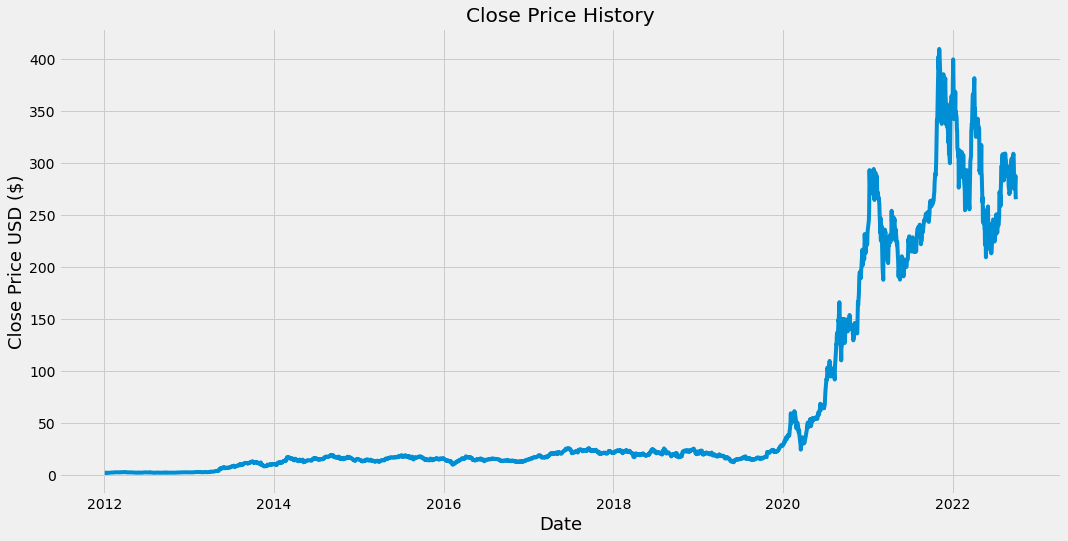

In [179]:
#Visualizing the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [180]:
# New DataFrame with only Close column
data = df.filter(['Close'])
#Convert the datafram to a numpy array
dataset = data.values
#Get no of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2164

In [181]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.70091859],
       [0.65293236],
       [0.64568548]])

In [182]:
#Create training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data to x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()


[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [183]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [184]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2104, 60, 1)

In [185]:
#Build the Lstm Model

model = Sequential()
model.add(LSTM (50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [186]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [187]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2104/2104 [==============================] - 63s 28ms/step - loss: 1.1186e-04


In [188]:
#Create testing dataset
#Create new array containing scaled values from index 2104 to 2705
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [189]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [190]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [191]:
#Get models predicted value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


17/17 [==============================] - 1s 17ms/step


In [192]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

20.00222078841627

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


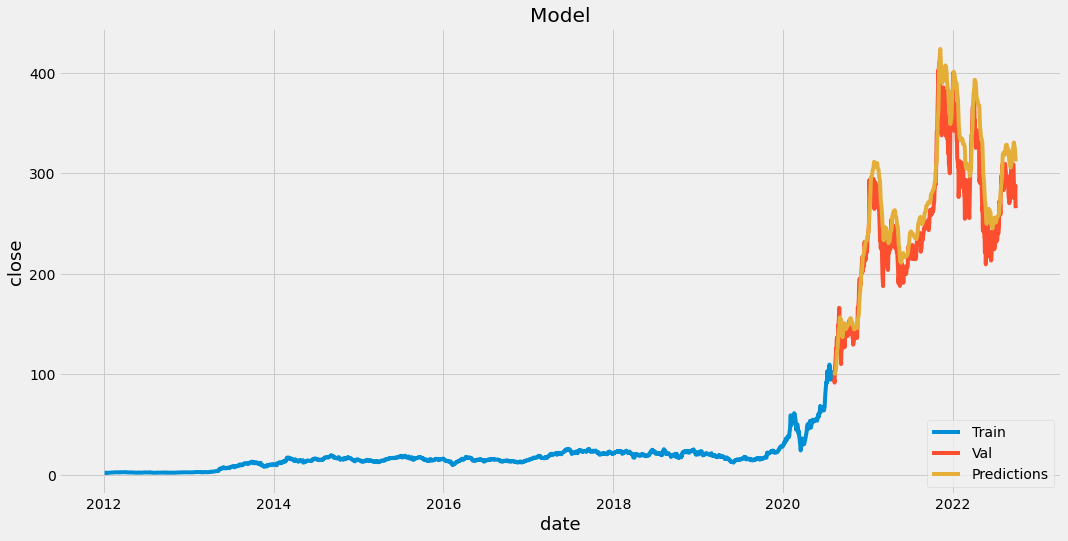

In [193]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize = 18)
plt.ylabel('close', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [194]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-08-10,94.571335,102.188248
2020-08-11,91.625999,101.563354
2020-08-12,103.650665,100.454643
2020-08-13,108.066666,100.806076
2020-08-14,110.047333,102.351593
...,...,...
2022-09-26,276.010010,325.136169
2022-09-27,282.940002,320.468933
2022-09-28,287.809998,317.058807


In [214]:
#Get the quote
apple_quote = web.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = '2022-08-15')
#Create a new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert X_test to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 68ms/step
[[321.53305]]


In [215]:
apple_quote2 = web.DataReader('TSLA', data_source = 'yahoo', start = '2022-08-15', end = '2022-08-15')
print(apple_quote2)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2022-08-15  313.133331  301.230011  301.786682  309.320007  89359200   

             Adj Close  
Date                    
2022-08-15  309.320007  
